In [2]:
import pandas as pd

# Load the datasets
file_path_2019 = 'india_election_2019.csv'
file_path_2024 = 'final_election_result.csv'

# Reading the CSV files
data_2019 = pd.read_csv(file_path_2019)
data_2024 = pd.read_csv(file_path_2024)


In [3]:

#First few rows and columns
data_2019.head(), data_2019.columns, data_2024.head(), data_2024.columns

(   Unnamed: 0    #     PC Name  No Type          State  \
 0           0  543     Vellore   8  GEN     Tamil Nadu   
 1           1  542   Karimganj   1   SC          Assam   
 2           2    1    Adilabad   1   ST      Telangana   
 3           3    2        Agra  18   SC  Uttar Pradesh   
 4           4    3  Ahmadnagar  37  GEN    Maharashtra   
 
                    Winning Candidate                     Party   Electors  \
 0                       Kathir Anand  Dravida Munetra Kazhagam  1438643.0   
 1                   Kripanath Mallah     Bharatiya Janta Party  1165997.0   
 2                     Soyam Bapu Rao     Bharatiya Janta Party  1382837.0   
 3              Satyapal Singh Baghel     Bharatiya Janta Party  1866262.0   
 4  Dr. Sujay Radhakrishna Vikhepatil     Bharatiya Janta Party  1793677.0   
 
        Votes  Turnout    Margin  Margin %  
 0  1028100.0    71.46    8141.0      0.79  
 1  1061160.0    79.18   38389.0      3.62  
 2  1063730.0    77.90   58560.0      5

**The top two parties and their votes in 2019 and 2024**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


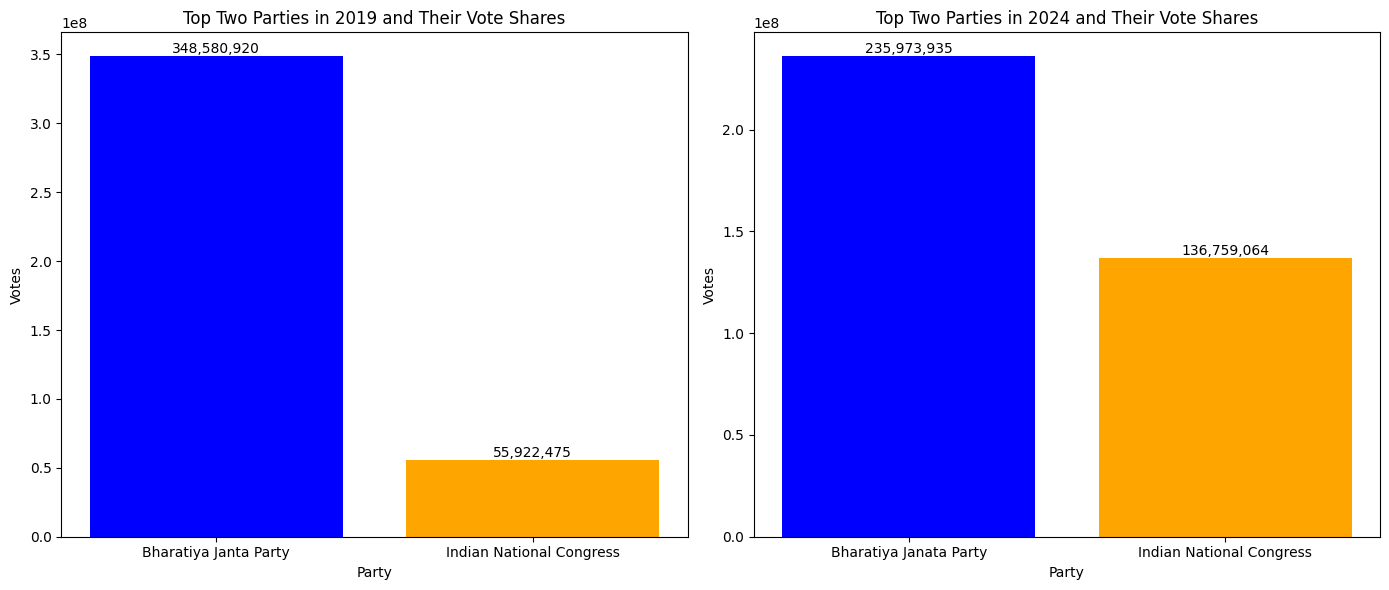

In [5]:

# Calculate top two parties in 2019
top_parties_2019 = data_2019.groupby('Party')['Votes'].sum().sort_values(ascending=False).head(2).reset_index()

# Process and calculate top two parties in 2024
data_2024['Total Votes'] = data_2024['Total Votes'].astype(str).str.replace(',', '')
data_2024['Total Votes'] = pd.to_numeric(data_2024['Total Votes'], errors='coerce')
top_parties_2024 = data_2024.groupby('Party Name')['Total Votes'].sum().sort_values(ascending=False).head(2).reset_index()

# Plotting the bar charts
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 2019 Bar Chart
bars_2019 = axs[0].bar(top_parties_2019['Party'], top_parties_2019['Votes'], color=['blue', 'orange'])
axs[0].set_title('Top Two Parties in 2019 and Their Vote Shares')
axs[0].set_xlabel('Party')
axs[0].set_ylabel('Votes')

# Adding labels on top of the bars for 2019
for bar in bars_2019:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval):,}', ha='center', va='bottom')

# 2024 Bar Chart
bars_2024 = axs[1].bar(top_parties_2024['Party Name'], top_parties_2024['Total Votes'], color=['blue', 'orange'])
axs[1].set_title('Top Two Parties in 2024 and Their Vote Shares')
axs[1].set_xlabel('Party')
axs[1].set_ylabel('Votes')

# Adding labels on top of the bars for 2024
for bar in bars_2024:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Insight 1:**
"The Indian National Congress experienced a significant surge in votes, increasing by 80,836,589. In contrast, the BJP observed a decline in their vote count."

<ipython-input-6-9a2cc6cdbe88>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top_candidates_2019['Winning Candidate'], rotation=45)
<ipython-input-6-9a2cc6cdbe88>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top_candidates_2024['Candidate Name'], rotation=45)


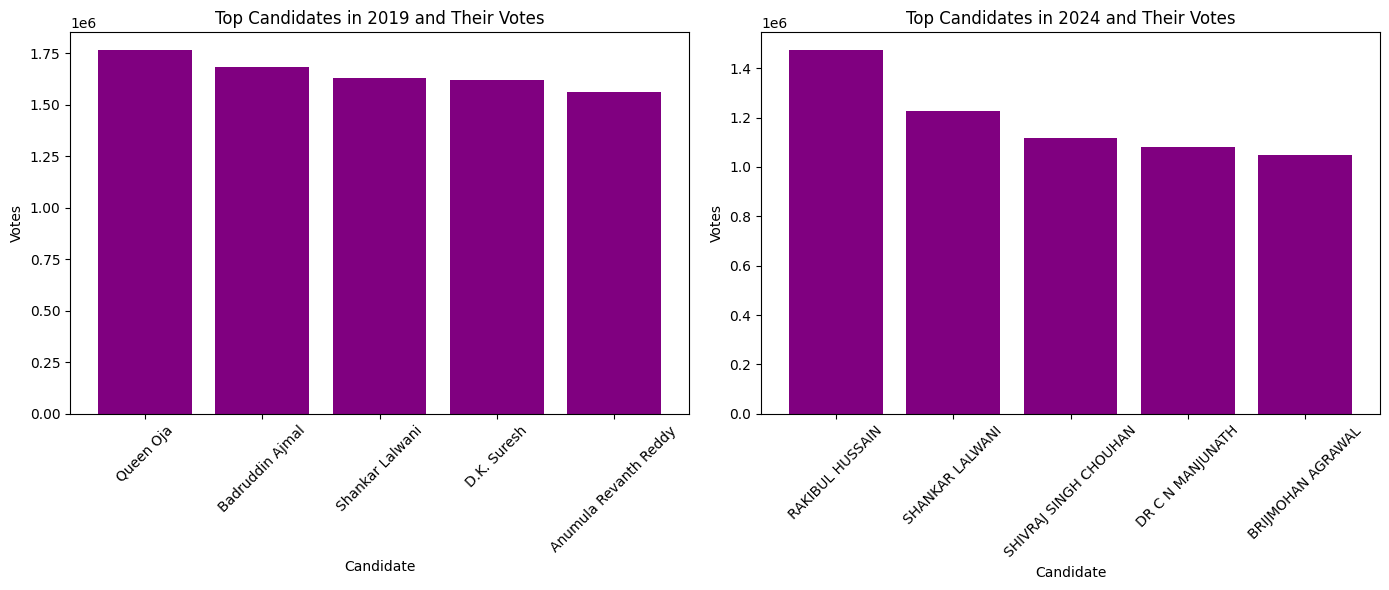

In [6]:
# Identify top candidates in 2019
top_candidates_2019 = data_2019.nlargest(5, 'Votes')[['Winning Candidate', 'Party', 'Votes']]

# Identify top candidates in 2024
top_candidates_2024 = data_2024.nlargest(5, 'Total Votes')[['Candidate Name', 'Party Name', 'Total Votes']]

# Plotting the bar charts
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 2019 Bar Chart
axs[0].bar(top_candidates_2019['Winning Candidate'], top_candidates_2019['Votes'], color='purple')
axs[0].set_title('Top Candidates in 2019 and Their Votes')
axs[0].set_xlabel('Candidate')
axs[0].set_ylabel('Votes')
axs[0].set_xticklabels(top_candidates_2019['Winning Candidate'], rotation=45)

# 2024 Bar Chart
axs[1].bar(top_candidates_2024['Candidate Name'], top_candidates_2024['Total Votes'], color='purple')
axs[1].set_title('Top Candidates in 2024 and Their Votes')
axs[1].set_xlabel('Candidate')
axs[1].set_ylabel('Votes')
axs[1].set_xticklabels(top_candidates_2024['Candidate Name'], rotation=45)

plt.tight_layout()
plt.show()


**Insight 2**:
"Shankar Lawani is the sole candidate to emerge as a top contender in both the 2019 and 2024 elections."

COMPARISION OF VOTES RECIVIED IN 2019 AND 2024

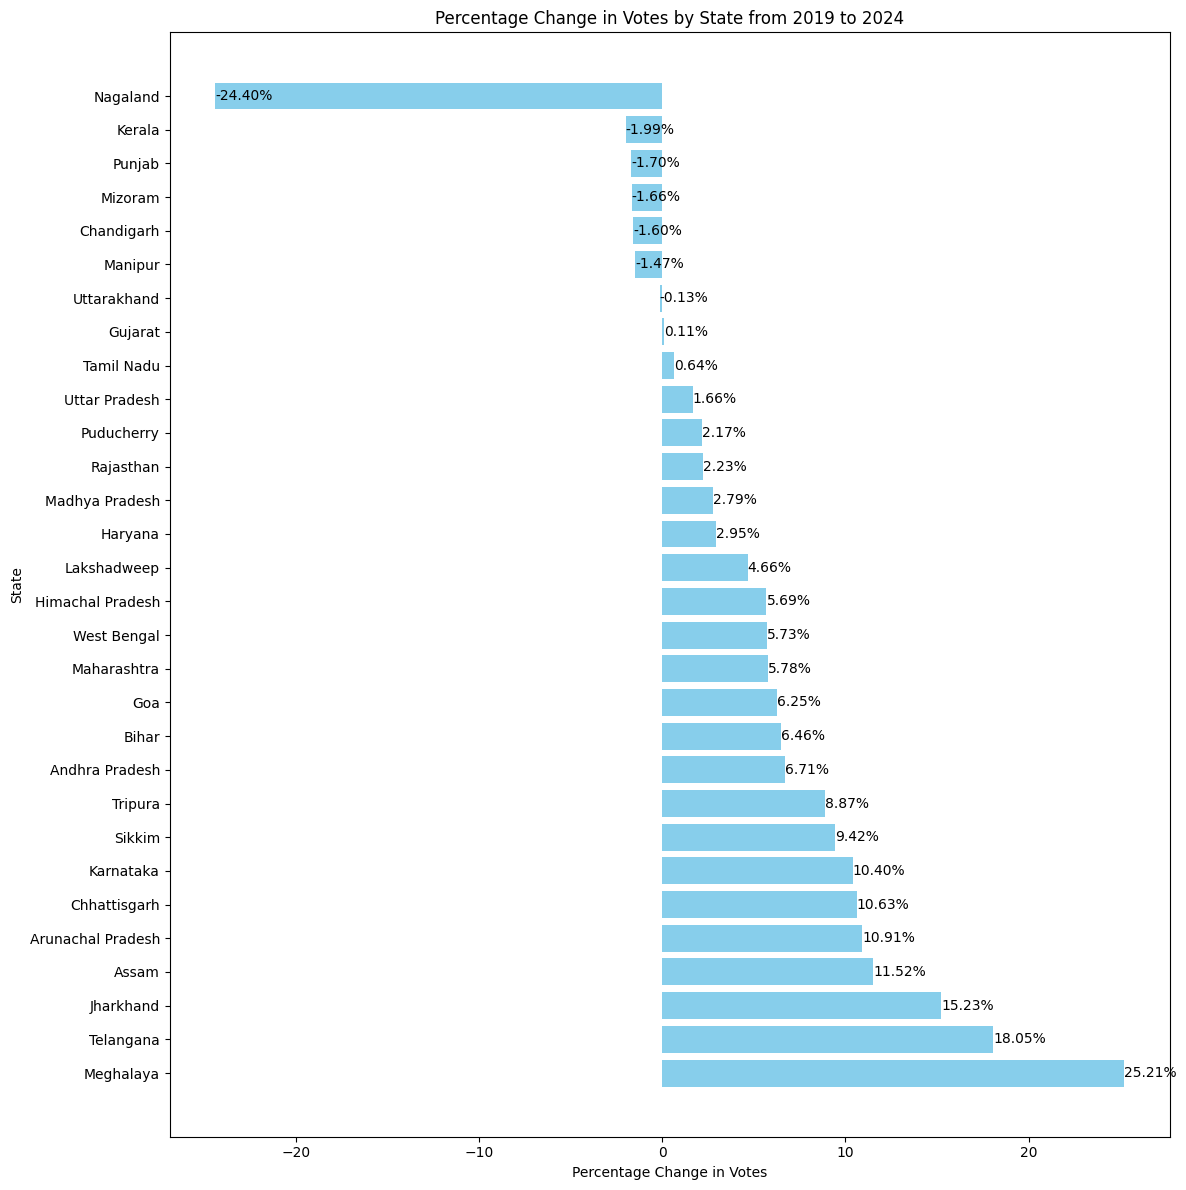

In [7]:
# Load the datasets
election_2019_df = pd.read_csv('india_election_2019.csv')
election_2024_df = pd.read_csv('final_election_result.csv')

# Convert columns to numeric, ensuring all values are treated as strings first
election_2019_df['Votes'] = pd.to_numeric(election_2019_df['Votes'], errors='coerce')
election_2024_df['Total Votes'] = pd.to_numeric(election_2024_df['Total Votes'].astype(str).str.replace(',', ''), errors='coerce')

# Aggregate total votes per state
votes_2019 = election_2019_df.groupby('State')['Votes'].sum().reset_index()
votes_2024 = election_2024_df.groupby('State')['Total Votes'].sum().reset_index()

# Merge the datasets on 'State'
votes_comparison = pd.merge(votes_2019, votes_2024, on='State', suffixes=('_2019', '_2024'))

# Calculate the difference and percentage change
votes_comparison['Vote Difference'] = votes_comparison['Total Votes'] - votes_comparison['Votes']
votes_comparison['Percentage Change'] = (votes_comparison['Vote Difference'] / votes_comparison['Votes']) * 100

# Sort by percentage change for better visualization
votes_comparison = votes_comparison.sort_values(by='Percentage Change', ascending=False)

# Plot the results using a horizontal bar chart
plt.figure(figsize=(12, 12))
bars = plt.barh(votes_comparison['State'], votes_comparison['Percentage Change'], color='skyblue')

# Add the data labels on the bars
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.2f}%',
        va='center',
        ha='left',
        color='black'
    )

plt.xlabel('Percentage Change in Votes')
plt.ylabel('State')
plt.title('Percentage Change in Votes by State from 2019 to 2024')
plt.tight_layout()
plt.show()


**INSIGHT :**   
From the years 2019 to 2024 there is a massive decrement in voting percentage in **"Nagaland"** i.e 24.40%
whereas in **"Meghalaya"** it is completely opposite i.e 25.21%

In [8]:
election_2019_df.head()

,Unnamed: 0,#,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %
0,0,543,Vellore,8,GEN,Tamil Nadu,Kathir Anand,Dravida Munetra Kazhagam,1438643.0,1028100.0,71.46,8141.0,0.79
1,1,542,Karimganj,1,SC,Assam,Kripanath Mallah,Bharatiya Janta Party,1165997.0,1061160.0,79.18,38389.0,3.62
2,2,1,Adilabad,1,ST,Telangana,Soyam Bapu Rao,Bharatiya Janta Party,1382837.0,1063730.0,77.90,58560.0,5.50
3,3,2,Agra,18,SC,Uttar Pradesh,Satyapal Singh Baghel,Bharatiya Janta Party,1866262.0,1145323.0,61.70,211546.0,18.50
4,4,3,Ahmadnagar,37,GEN,Maharashtra,Dr. Sujay Radhakrishna Vikhepatil,Bharatiya Janta Party,1793677.0,1203797.0,67.30,281474.0,23.40


In [9]:
try:
    # Calculate BJP votes in each state for 2019 and 2024
    bjp_votes_2019 = election_2019_df[election_2019_df['Party'] == 'Bharatiya Janta Party'].groupby('State')['Votes'].sum()
    print("BJP Votes in 2019:")
    print(bjp_votes_2019)

    bjp_votes_2024 = election_2024_df[election_2024_df['Party Name'] == 'Bharatiya Janata Party'].groupby('State')['Total Votes'].sum()
    print("\nBJP Votes in 2024:")
    print(bjp_votes_2024)

    # Calculate the difference in votes between 2019 and 2024
    difference = bjp_votes_2024 - bjp_votes_2019

    # Find states with the largest differences
    states_with_largest_difference = difference.dropna().abs().nlargest(5).index.tolist()
    largest_differences = difference.loc[states_with_largest_difference]

    # Output the states and their differences
    print("\nStates with the largest differences in BJP votes:")
    for state, diff in zip(states_with_largest_difference, largest_differences):
        print(f"{state}: {diff}")

except Exception as e:
    print(f"Error occurred: {e}")


BJP Votes in 2019:
State
Arunachal Pradesh      652091.0
Assam                10445953.0
Bihar                17326475.0
Chandigarh             456568.0
Chhattisgarh         11564704.0
Daman & Diu             87469.0
Delhi                 8679012.0
Goa                    428628.0
Gujarat              29082446.0
Haryana              12681536.0
Himachal Pradesh      3850733.0
Jammu & Kashmir       2785344.0
Jharkhand            11928569.0
Karnataka            30860014.0
Madhya Pradesh       35662579.0
Maharashtra          25853307.0
Manipur                759301.0
Orissa                9320936.0
Punjab                2094678.0
Rajasthan            31237940.0
Telangana             4189301.0
Tripura               2153172.0
Uttar Pradesh        67045421.0
Uttarakhand           4842925.0
West Bengal          24591818.0
Name: Votes, dtype: float64

BJP Votes in 2024:
State
Andaman & Nicobar Islands                 102436.0
Andhra Pradesh                           3808784.0
Arunachal Pradesh  

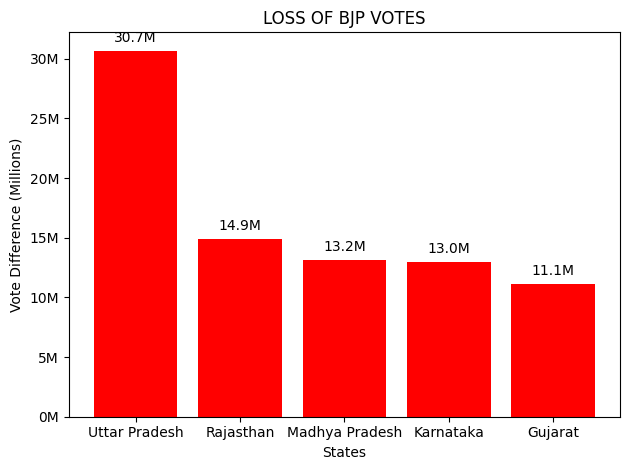

In [10]:

import matplotlib.ticker as ticker

# Data for states and their corresponding differences (in millions)
states = ['Uttar Pradesh', 'Rajasthan', 'Madhya Pradesh', 'Karnataka', 'Gujarat']
losses = [
    30681410,
    14914488,
    13171728,
    12980753,
    11092496
]

# Convert losses to millions
losses_in_millions = [loss / 1000000 for loss in losses]

# Create a figure and axis
fig, ax = plt.subplots()

# Plotting the bar chart
bars = ax.bar(states, losses_in_millions, color='red')

# Adding numerical values on top of each bar
for bar, loss in zip(bars, losses_in_millions):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{loss:.1f}M', ha='center', va='bottom')

# Adding titles and labels
ax.set_title('LOSS OF BJP VOTES')
ax.set_xlabel('States')
ax.set_ylabel('Vote Difference (Millions)')

# Format y-axis ticks to display in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}M'))

# Display the plot
plt.tight_layout()
plt.show()



In [11]:
try:
    #INC
    inc_votes_2019 = election_2019_df[election_2019_df['Party'] == 'Indian National Congress'].groupby('State')['Votes'].sum()
    print("INC Votes in 2019:")
    print(inc_votes_2019)

    inc_votes_2024 = election_2024_df[election_2024_df['Party Name'] == 'Indian National Congress'].groupby('State')['Total Votes'].sum()
    print("\nINC Votes in 2024:")
    print(inc_votes_2024)

    # Calculate the difference in votes between 2019 and 2024
    difference = inc_votes_2024 - inc_votes_2019

    # Find states with the largest differences
    states_with_largest_difference = difference.dropna().abs().nlargest(5).index.tolist()
    largest_differences = difference.loc[states_with_largest_difference]

    # Output the states and their differences
    print("\nStates with the largest differences in INC votes:")
    for state, diff in zip(states_with_largest_difference, largest_differences):
        print(f"{state}: {diff}")

except Exception as e:
    print(f"Error occurred: {e}")

INC Votes in 2019:
State
Andaman & Nicobar      207296.0
Assam                 4376711.0
Bihar                 1101603.0
Chhattisgarh          2049849.0
Goa                    424575.0
Jharkhand              879329.0
Karnataka             1621906.0
Kerala               15366143.0
Madhya Pradesh        1248031.0
Maharashtra           1238474.0
Meghalaya              784190.0
Orissa                1080161.0
Puducherry             790760.0
Punjab                8192023.0
Tamil Nadu            9072272.0
Telangana             3951397.0
Uttar Pradesh          958556.0
West Bengal           2579199.0
Name: Votes, dtype: float64

INC Votes in 2024:
State
Andaman & Nicobar Islands                  78040.0
Andhra Pradesh                            912118.0
Arunachal Pradesh                         219839.0
Assam                                    7510363.0
Bihar                                    3996625.0
Chandigarh                                216657.0
Chhattisgarh                           

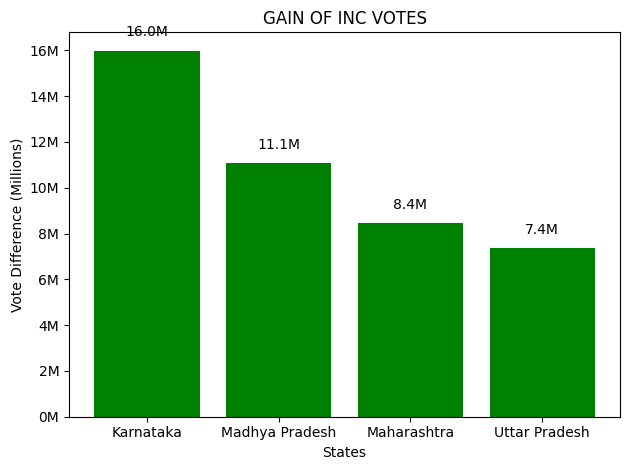

In [12]:

import matplotlib.ticker as ticker

# Data for states and their corresponding differences (in millions)
states = ['Karnataka',
'Madhya Pradesh',
'Maharashtra',
'Uttar Pradesh']
losses = [
   15984763.0,
 11060018.0,
 8438461.0,
 7356971.0

]

# Convert losses to millions
votes_in_millions = [loss / 1000000 for loss in losses]

# Create a figure and axis
fig, ax = plt.subplots()

# Plotting the bar chart
bars = ax.bar(states, votes_in_millions, color='green')

# Adding numerical values on top of each bar
for bar, loss in zip(bars, votes_in_millions):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{loss:.1f}M', ha='center', va='bottom')

# Adding titles and labels
ax.set_title('GAIN OF INC VOTES')
ax.set_xlabel('States')
ax.set_ylabel('Vote Difference (Millions)')

# Format y-axis ticks to display in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}M'))

# Display the plot
plt.tight_layout()
plt.show()



In [13]:
election_2024_df.head()

,Sr No,State,Constituency,Candidate Name,Party Name,EVM Votes,Postal Votes,Total Votes,Percent Votes
0,1,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58
1,2,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54
2,3,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08
3,4,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97
4,5,Andaman & Nicobar Islands,Parliamentary Constituency 1 - Andaman & Nic...,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09


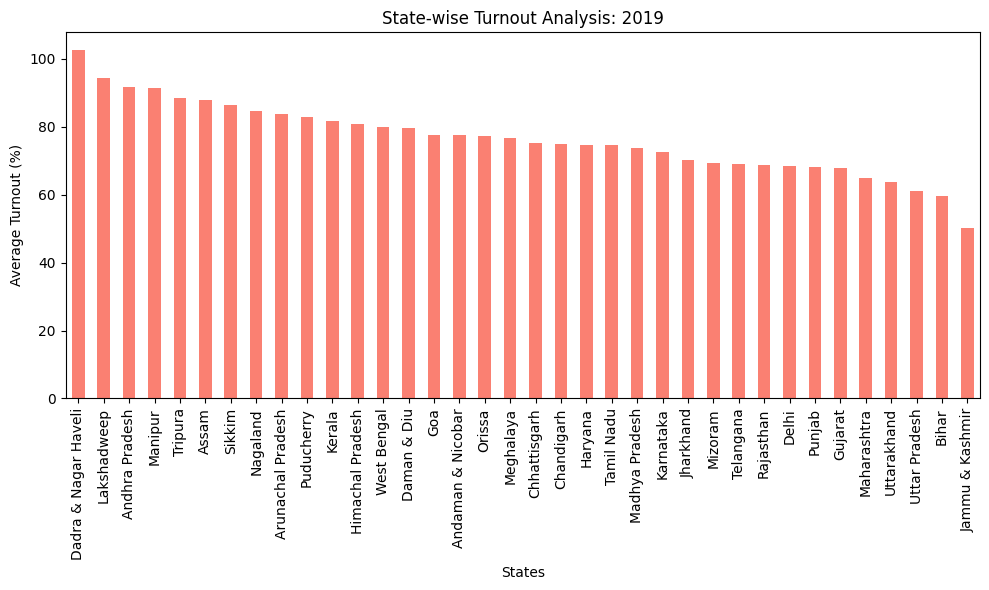

In [14]:


# Calculate average turnout percentage per state
state_turnout_2019 = election_2019_df.groupby('State')['Turnout'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
state_turnout_2019.plot(kind='bar', color='salmon')
plt.xlabel('States')
plt.ylabel('Average Turnout (%)')
plt.title('State-wise Turnout Analysis: 2019')
plt.xticks()
plt.tight_layout()
plt.show()
